In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 100

# Demonstrations

## Linear Regression

Text(0.5, 1.0, 'Linear Regression')

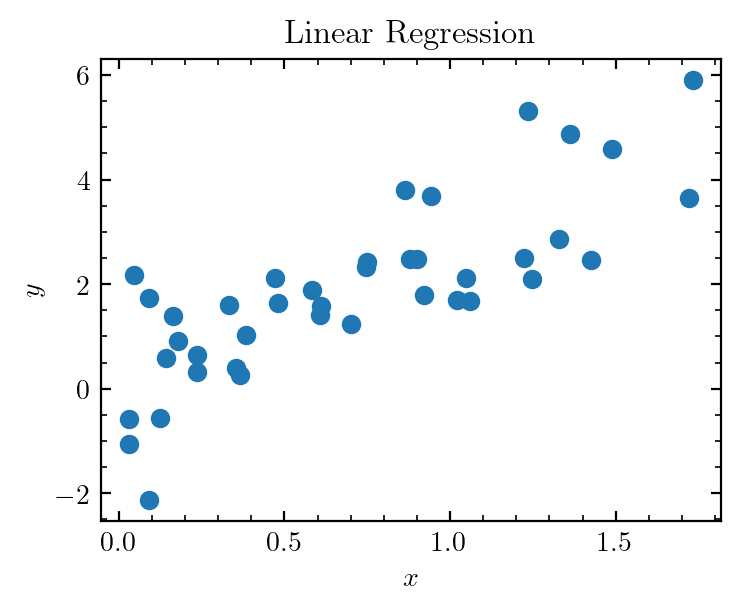

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.uniform(0, 2, size=40)
y = 3 * x + np.random.normal(size=len(x))
plt.scatter(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Linear Regression')

## Homo- and Heteroscedasticity

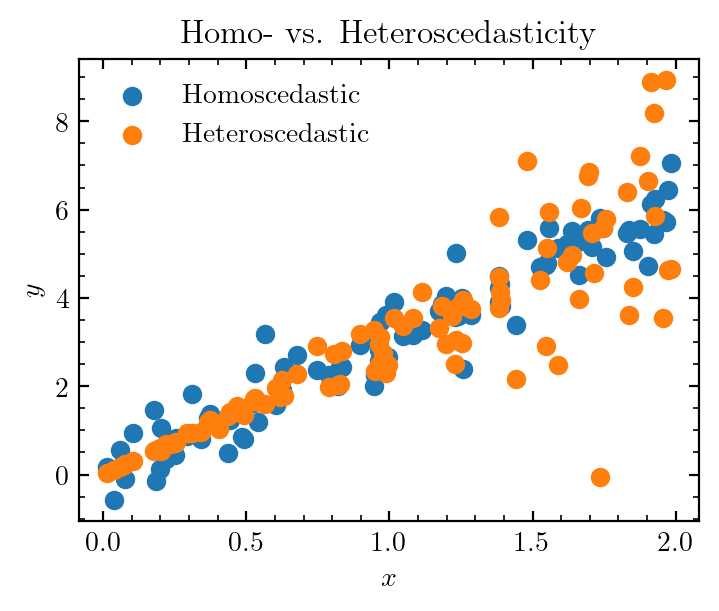

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.uniform(0, 2, size=100)
y = 3 * x
plt.scatter(x, y + np.random.normal(scale=0.5, size=len(x)), label='Homoscedastic')
plt.scatter(x, y + np.random.normal(scale=0.5 * x**2, size=len(x)), label='Heteroscedastic')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Homo- vs. Heteroscedasticity')
plt.legend(loc='best', frameon=False)

## Fitting a Line with Linear Regression

Linear Algebra: [0.57402347 2.84538725]
SciPy linregress: [0.57402347 2.84538725]
NumPy polyfit: [0.57402347 2.84538725]
scikit-learn: [0.57402347 2.84538725]


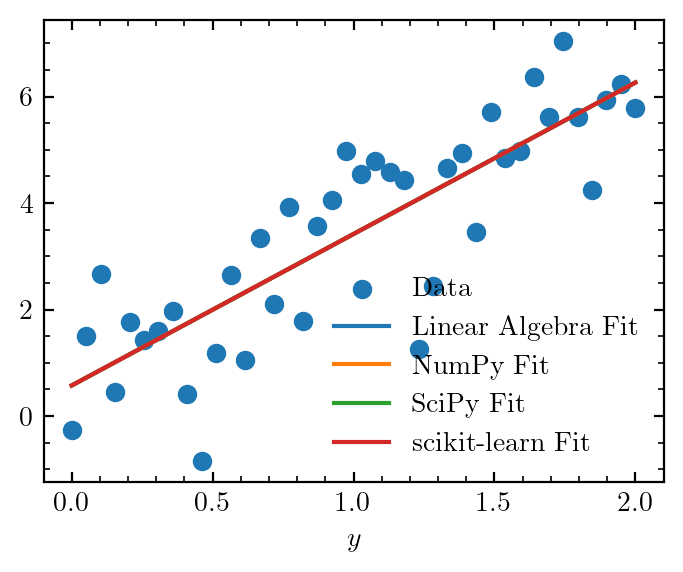

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

sigma = 1.0
x = np.linspace(0, 2, 40)
y = 3 * x + np.random.normal(scale=sigma, size=len(x))
plt.scatter(x, y, label='Data')

# Linear Algebra Implementation
X = np.column_stack([np.ones(len(x)), x])
beta_la = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'Linear Algebra: {beta_la}')

# SciPy
result = linregress(x, y)
beta_sp = np.array([result.intercept, result.slope])
print(f'SciPy linregress: {beta_sp}')

# NumPy Implementation
beta_np = np.polyfit(x, y, deg=1)[::-1]
print(f'NumPy polyfit: {beta_np}')

# scikit-learn Implementation
reg = LinearRegression(fit_intercept=False).fit(X, y)
beta_sk = reg.coef_
print(f'scikit-learn: {beta_sk}')

plt.plot(x, X @ beta_la, label='Linear Algebra Fit')
plt.plot(x, np.polyval(beta_np[::-1], x), label='NumPy Fit')
plt.plot(x, result.intercept + result.slope * x, label='SciPy Fit')
plt.plot(x, reg.predict(X), label='scikit-learn Fit')
plt.xlabel(r'$x$')
plt.xlabel(r'$y$')
plt.legend(loc='best', frameon=False)

## Linear Regression Variance

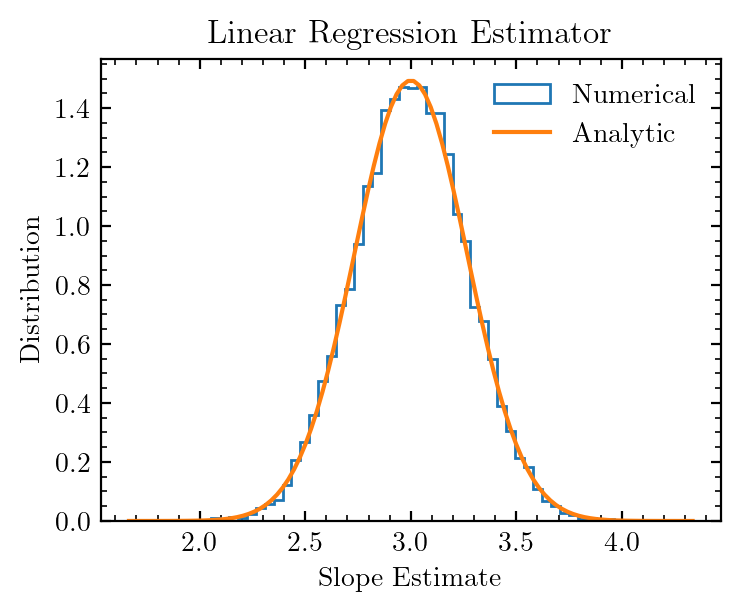

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

sigma = 1.0
x = np.linspace(0, 2, 40)
X = np.column_stack([np.ones(len(x)), x])
beta = np.array([0, 3])

beta_est = []
for _ in range(10**4):
    y = X @ beta + np.random.normal(scale=sigma, size=len(x))
    beta_est.append(np.linalg.inv(X.T @ X) @ X.T @ y)
beta_est = np.array(beta_est)

beta_var = sigma**2 * np.linalg.inv(X.T @ X)
beta_std = np.sqrt(np.diag(beta_var))
plt.hist(beta_est[:, 1], bins=50, density=True, histtype='step', label='Numerical')
slope = np.linspace(beta[1] - 5 * beta_std[1], beta[1] + 5 * beta_std[1], 100)
plt.plot(slope, norm(loc=beta[1], scale=beta_std[1]).pdf(slope), label='Analytic')
plt.xlabel(r'Slope Estimate')
plt.ylabel(r'Distribution')
plt.title('Linear Regression Estimator')
plt.legend(loc='best', frameon=False)

# Exercises

## Problem 1: Polynomial Regression

In the above example, you have seen how to fit a line through data using linear regression. This is a special case of polynomial regression where the dependent varialble $Y$ is modeled as a polynomial of the independent variable $X$. In this exercise, you will implement polynomial regression up to arbitrary degrees $p$, i.e., $f(x) = \beta_0 + \beta_1 x^1 + \beta_2 x^2 + ... + \beta_p x^p$.

(a) Implement the function `poly_fit_predict` described in the code below.

(b) Determine the best-fit for $p=5$ for the provided data and overlay the prediction in the scatter plot below.

(c) For $p=1$ to $p=10$, determine the mean squared error (MSE) of the polynomial fit, $\mathrm{MSE} = \sum\limits_{i=1}^n (\hat y_i - y_i)^2 / n$, where $n$ is the number of data points. Which polynomial degree $p$ performs best and why?

P = 1, MSE = 0.702
P = 2, MSE = 0.663
P = 3, MSE = 0.360
P = 4, MSE = 0.343
P = 5, MSE = 0.340
P = 6, MSE = 0.336
P = 7, MSE = 0.324
P = 8, MSE = 0.307
P = 9, MSE = 0.280
P = 10, MSE = 0.279


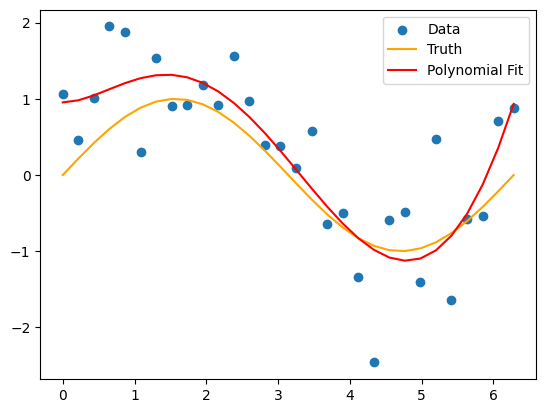

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def poly_fit_predict(x_arr, y_arr, p):
    """Perform polynomial regression and return prediction on training data.

    Parameters
    ----------
    x : numpy.ndarray
        Input x values.
    y : numpy.ndarray
        Input y values.
    p : int
        Polynomial degree.
    Returns
    -------
    y_pred : numpy.ndarray
        Best-fit y predictions for the input x values. This should be the same
        as `np.polyval(np.polyfit(x, y, p), x)`.

    """
    X = np.empty((len(x_arr), p + 1))
    for row in range(len(X)):
        for col in range(len(X[0])):
            X[row][col] = pow(x_arr[row], col)

    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return X @ beta

np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 30)
y = np.sin(x) + np.random.normal(scale=0.6, size=len(x))
plt.scatter(x, y, zorder=-1, label='Data')
plt.plot(x, np.sin(x), color='orange', label='Truth')
plt.plot(x, poly_fit_predict(x, y, 5), color = "red", label = "Polynomial Fit")
plt.legend()

for p in range(1, 11):
    MSE = (np.mean((y - poly_fit_predict(x, y, p)) ** 2))
    print(f'P = {p}, MSE = {MSE:0.3f}')